In [57]:
import pandas as pd
import os
os.chdir('../utils')

from common_utils import *
from rsa import *

### Rabin-Miller Test

In [58]:
primes = pd.read_csv('primes.csv', header=None, names=['prime'])
prime_list = primes['prime'].tolist()
# get 1000 random primes
sample_primes = primes.sample(10000)

In [59]:
# iterate over the sample primes
for index, row in sample_primes.iterrows():
    prime_test = int(row['prime'])
    if not miller_rabin(prime_test, 15):
        print('Failed on prime: ', prime_test)
        break
print('All primes passed the test')

All primes passed the test


In [60]:
composites = []

# generate 1000 composites
i = 18
while len(composites) < 1000:
    if i in prime_list:
        i += 1
        continue
    composites.append(i)
    i += 1

In [61]:
for i in composites:
    if miller_rabin(i, 15)[0]:
        print('Failed on composite: ', i)
        break
print('All composites passed the test')

All composites passed the test


### Wiener Attack (Vanilla)

In [62]:
# n is 1024 bits, 15 passes in rabin-miller
e, n, d, _, _, _ = gen_vulnerable_keys(nbits=1024, s=15)
message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
encrypted_message = encrypt(message, n, e)
print(encrypted_message)

312047468835715374051682406114610461957263798870294443400614279844677460473161893041675683484983343653187522442911677829172355668096487546736181151618954596515651219226092831957470677514825792248680661079052575278860930732654695091438798091411631426558705077375815639882573446182867111824153511665339444116943 204395265535356975755456596435146710596061195592566631969906850992666363654116073504308716024552382874387720900463392790652472563377629993305361191601215407779406805584666937413629260436635893915237736290142907636994994813655214536919544319659415364268056527003174944484712839786523949394015473325624871509359 152259880660318815220729189244910071340068920340123223717365202920959845546369248751666590014668665635442088332918065778583414496878320228943178971893329183451702140268542534256346301622296321194902012734038432365892142668826639274708555574965452358409366553776466865632086558102976746505671871912490375183445 3011038532393675936911947701412554070887923626998251734366903696880390

In [63]:
potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked
print(potential_private_keys)
print(f"Number of candidates: {len(potential_private_keys)}")

[3, 15, 49, 433, 497, 7007, 7937, 1705589, 1799903, 12505007, 26809917, 4509843021, 4577767765, 333905347869, 19114936723559, 38563778794987, 58012620866415, 154589020527817, 3729251429391167, 4444183911163837, 181496607875944647, 367437399663053131, 1651246206528157171, 9540039839505889895, 17428833472483622619, 24740138365886564335347, 25917410248382472940715, 4166816690577098600428275, 4994996546642841825925787, 44126789063719833207834571, 4427663896011911846261234461, 23599498515708956568990638935, 42771333135406001291720043409, 517683661520883927346901755369, 755139825713622890374492611349, 2027963312948129708095886978067, 165537851836033013173488239590145, 333103666985014156055072366158357, 500669482133995298936656492726569, 1334442631253004753928385351611495, 3169554744640004806793427195949559, 7673552120533014367515239743510613, 83575300176744148587675908319731817, 94418407041917167761984575259191989, 1405432998763584497255459961948419663, 79742850408221820691687588196962613007

In [64]:
d = check_private_key(potential_private_keys, e, n)
print(f"Decryption key is: {d}")
print(decrypt(encrypted_message, n, d))

Decryption key is: 27209518981911333291812128306327961464731123639079396035946872998164861087185
Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries.


In [65]:
# check it passes for 100 random tries
for i in range(0, 100):
    e, n, d, _, _, _ = gen_vulnerable_keys(nbits=1024, s=15)
    message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
    encrypted_message = encrypt(message, n, e)
    potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked

    d = check_private_key(potential_private_keys, e, n)
    if d == -1:
        print("Failed!")
        break
if not d == -1:
    print("Success!")

Success!


### Wiener Attack (Expanded Bounds)

In [66]:
e, n, d, _, _, _ = gen_vulnerable_keys_v2(nbits=1024, s=15)
message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
encrypted_message = encrypt(message, n, e)
print(encrypted_message)

190758147115805653811060403754744167619379875826715537313045670803175940548770677108590977754059389491648575383113618104314153322363498420992117190684886301723641089731191322694553768997207429588861384033526483944514870249901323565548874573766102952384255995831763581502580633929422371038258749967604713885419 160535262200515688090418575779830139778095847492572084925439148188516004313320077859050506841052784752986612942433373567187422053048740302032094799394759319570724341643922851554182961314172351692608152408931455712083222461830417203842750134559759485460916353304723887272101037676228183191613370972689752844779 198173214409833597948322384508454312226679200416341083107323560799047487958330821124423444526900899109078722106034747244225705552133743716234644047420926283001884868462380804017366934628599857970295501117873392680168811925824024272339190512646201690999027082732257502321230758291185400002986266792470007023979 8313345693808426645118003251889859229959378945427595569915894346452661

In [67]:
potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked
print(potential_private_keys)
print(f"Number of candidates: {len(potential_private_keys)}")

[1, 3, 167, 337, 7247, 115615, 700937, 5491881, 10282825, 89156355, 104931061, 11556088605, 34862353231, 1615224337231, 3265311027693, 315619574382829, 1582978407279069, 19311360461731657, 37039742516184245, 93390845494100147, 149741948472016049, 392874742438132245, 7165136209380480557, 10551266942851654713, 253623281370877845357, 841893848921975599619, 5304986374902731443071, 11451866598727438485761, 51112452769812485386115, 499672661099397415375389, 84995464839667373099202245, 170490602340434143613779879, 10656412155268783071984305521, 14151719339578232714774480735, 38959850834425248501533266991, 1572545752716588172776105160375, 4795556959818615015331382015107, 6407062563369628436609020442473, 51217540656122602244370630272793, 392130643162422946066415619282291, 505768343997856394007097282285457, 1403667331158135734080610183853205, 3313103006314127862168317649991867, 78781428405870345402151162991513019, 241061055555083299802702416808384129, 403340682704296254203253670625255239, 104774

In [68]:
d = check_private_key(potential_private_keys, e, n)
print(f"Decryption key is: {d}")
print(decrypt(encrypted_message, n, d))

Decryption key is: 9171406490048000380381369803320237220592490003864747478071530884902801124361
Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries.


In [69]:
# check it passes for 100 random tries
for i in range(0, 100):
    e, n, d, _, _, _ = gen_vulnerable_keys_v2(nbits=1024, s=15)
    message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
    encrypted_message = encrypt(message, n, e)
    potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked

    d = check_private_key(potential_private_keys, e, n)
    if d == -1:
        print("Failed!")
        break
if not d == -1:
    print("Success!")

Success!


### Time Complexity

In [74]:
nbit_arr = []
for i in range(32, 2049):
    if i % 16 == 0:
        nbit_arr.append(i)


ops = []
ops_count = 0
for i in nbit_arr:
    e, n, d, _, _, _ = gen_vulnerable_keys(nbits=i, s=15)
    potential_private_keys, ops_count = wiener_atk(e, n, d)
    if check_private_key(potential_private_keys, e, n) == -1:
        print('Failed on nbits: ', i)
        break
    ops.append(ops_count)
    ops_count = 0

Text(0, 0.5, 'Number of operations')

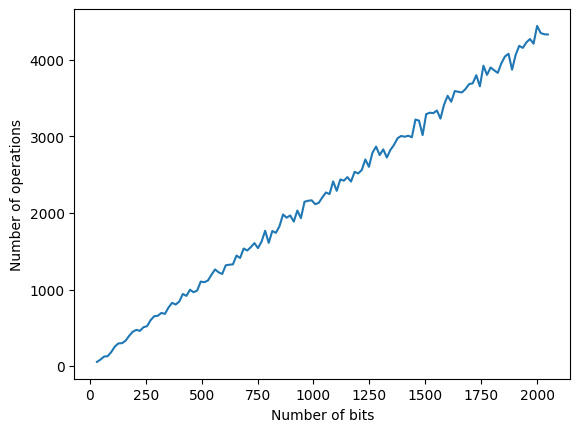

In [75]:
import matplotlib.pyplot as plt
# plot the time 

plt.plot(nbit_arr, ops)

plt.xlabel('Number of bits')
plt.ylabel('Number of operations')

# References

https://www.geeksforgeeks.org/primality-test-set-3-miller-rabin/

https://www.w3schools.com/python/ref_random_getrandbits.asp#:~:text=The%20getrandbits()%20method%20returns,specified%20size%20(in%20bits)